In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [2]:
#importing data
country = pd.read_csv("C:/Users/rajat/UpGrad/Principal Component Analysis Assignment/Country-data.csv")
country.head()
index_list = country['country'].tolist()

In [3]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.4+ KB


In [4]:
gdplist = ['exports','health','imports']
for i in gdplist:
    country[i] = country[i]*country['gdpp']/100
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [5]:
# 2. rescaling
rfm_df = country[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 9)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(rfm_df_scaled)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [7]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [8]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

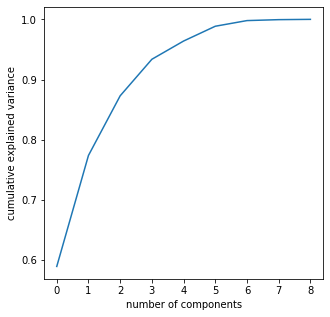

In [9]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [10]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [11]:
df_pca = pca_final.fit_transform(rfm_df_scaled)
df_pca_frame = pd.DataFrame(df_pca)
df_pca_frame.set_index(pd.Series(index_list),inplace = True)
df_pca_frame.head()

,0,1,2
Afghanistan,-2.637442,1.469038,-0.541359
Albania,-0.022277,-1.431896,-0.020701
Algeria,-0.457626,-0.673301,0.961867
Angola,-2.724520,2.174583,0.606687
Antigua and Barbuda,0.649849,-1.024374,-0.250103


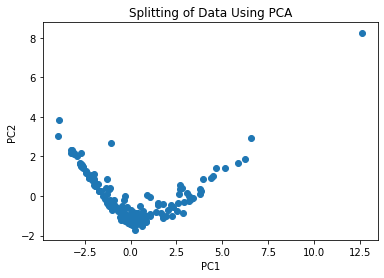

In [12]:
#visualising Data Using PC1 and PC2
plt.scatter(df_pca_frame[0],df_pca_frame[1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Splitting of Data Using PCA')
plt.show()

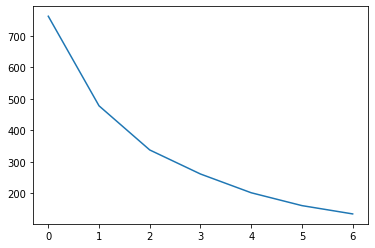

In [13]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca_frame)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [14]:
# silhouette analysis
range_n_clusters = [2,3,4,5,6,7]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca_frame)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_frame, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.49093050017646545
For n_clusters=3, the silhouette score is 0.4784861729146495
For n_clusters=4, the silhouette score is 0.48186916213510383
For n_clusters=5, the silhouette score is 0.4874808195529213
For n_clusters=6, the silhouette score is 0.4703400869820655
For n_clusters=7, the silhouette score is 0.40123608433816815


In [15]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_pca_frame)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
# assign the label
country['cluster_id'] = kmeans.labels_
country.set_index(pd.Series(index_list),inplace = True)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
Afghanistan,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
Albania,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
Algeria,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
Angola,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
Antigua and Barbuda,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


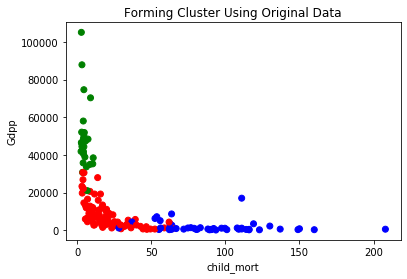

In [17]:
#visualizing clusters using original data
label_color = []
for i in kmeans.labels_:
    if i == 0:
        label_c = 'r'
    elif i == 1:
        label_c = 'g'
    else:
        label_c = 'b'
    label_color.append(label_c)
plt.xlabel('child_mort')
plt.ylabel('Gdpp')
plt.title('Forming Cluster Using Original Data')
plt.scatter(country['child_mort'],country['gdpp'],c = label_color)

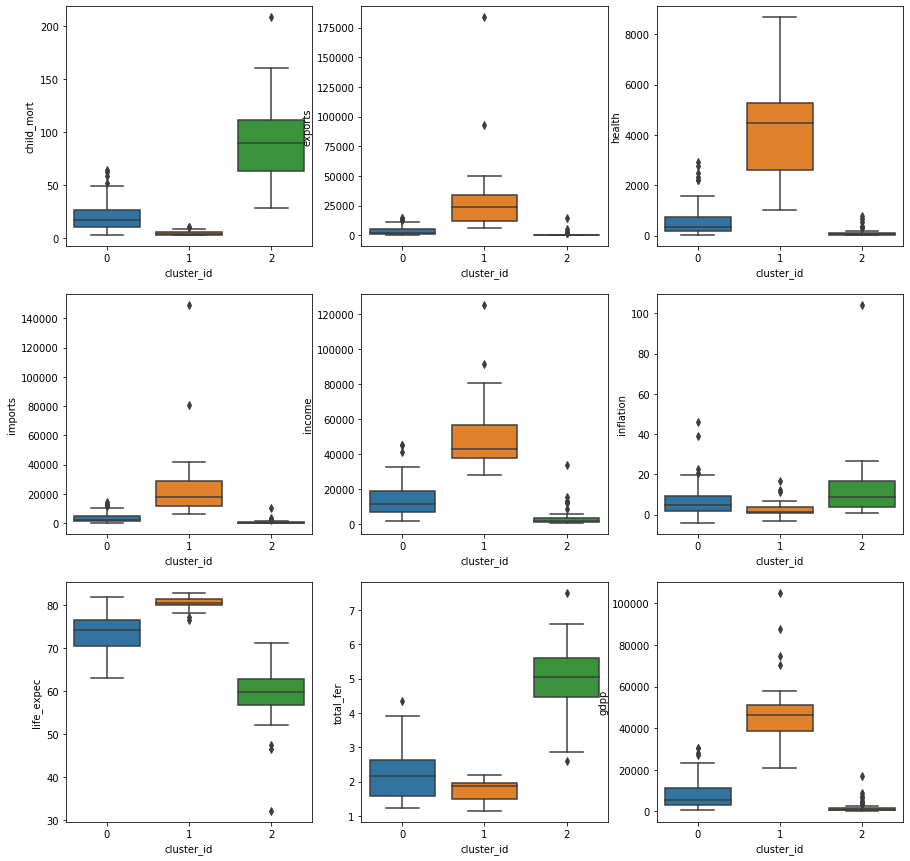

In [18]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.boxplot(x='cluster_id', y='child_mort',data =country)
plt.subplot(3,3,2)
sns.boxplot(x='cluster_id', y='exports',data =country)
plt.subplot(3,3,3)
sns.boxplot(x='cluster_id', y='health',data =country)
plt.subplot(3,3,4)
sns.boxplot(x='cluster_id', y='imports',data =country)
plt.subplot(3,3,5)
sns.boxplot(x='cluster_id', y='income',data =country)
plt.subplot(3,3,6)
sns.boxplot(x='cluster_id', y='inflation',data =country)
plt.subplot(3,3,7)
sns.boxplot(x='cluster_id', y='life_expec',data =country)
plt.subplot(3,3,8)
sns.boxplot(x='cluster_id', y='total_fer',data =country)
plt.subplot(3,3,9)
sns.boxplot(x='cluster_id', y='gdpp',data =country)

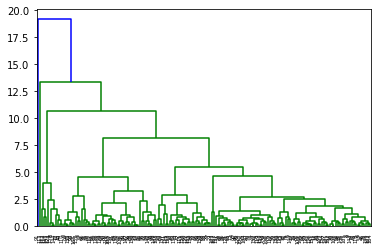

In [19]:
# complete linkage
mergings = linkage(df_pca_frame, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

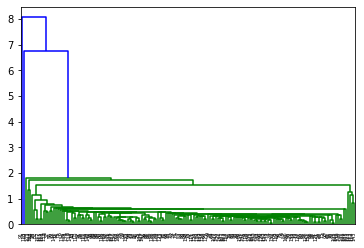

In [20]:
# complete linkage
mergings = linkage(df_pca_frame, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [21]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
country['cluster_labels'] = cluster_labels

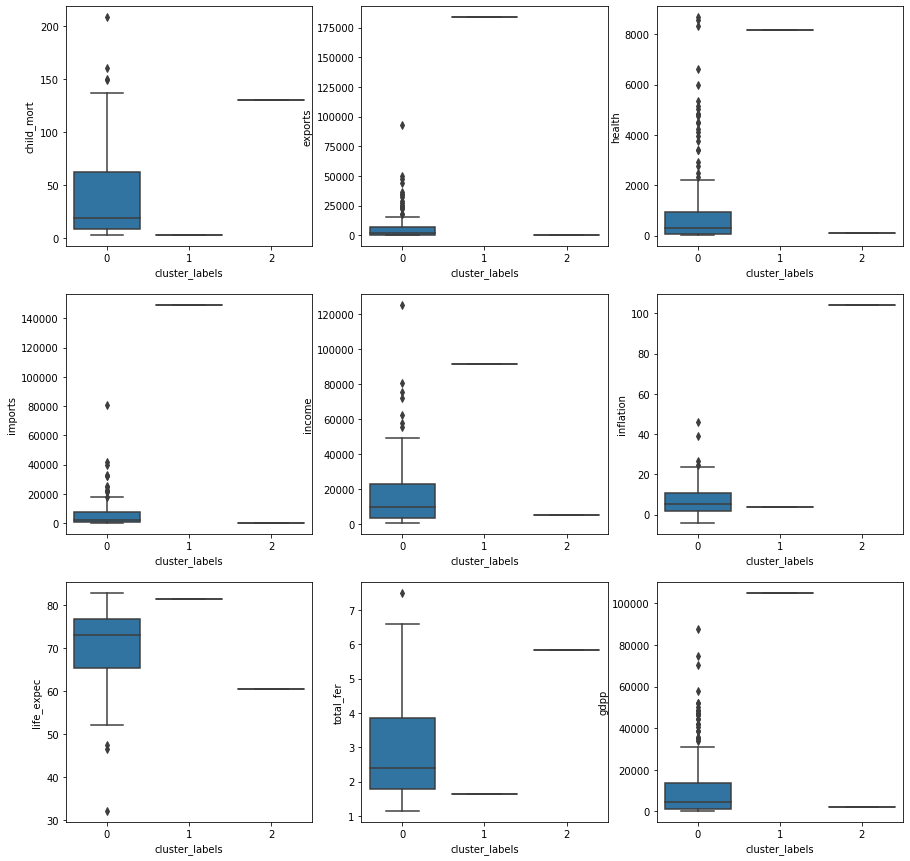

In [23]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.boxplot(x='cluster_labels', y='child_mort',data =country)
plt.subplot(3,3,2)
sns.boxplot(x='cluster_labels', y='exports',data =country)
plt.subplot(3,3,3)
sns.boxplot(x='cluster_labels', y='health',data =country)
plt.subplot(3,3,4)
sns.boxplot(x='cluster_labels', y='imports',data =country)
plt.subplot(3,3,5)
sns.boxplot(x='cluster_labels', y='income',data =country)
plt.subplot(3,3,6)
sns.boxplot(x='cluster_labels', y='inflation',data =country)
plt.subplot(3,3,7)
sns.boxplot(x='cluster_labels', y='life_expec',data =country)
plt.subplot(3,3,8)
sns.boxplot(x='cluster_labels', y='total_fer',data =country)
plt.subplot(3,3,9)
sns.boxplot(x='cluster_labels', y='gdpp',data =country)

In [24]:
#results may slightly vary if the kernal is restarted again
country_aid = ['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote dIvoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia']